In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [10]:
print ('No. of zero values in Glucose ',df[df['Glucose']==0].shape[0])
print ('No. of zero values in BloodPressure ',df[df['BloodPressure']==0].shape[0])
print ('No. of zero values in SkinThickness ',df[df['SkinThickness']==0].shape[0])
print ('No. of zero values in Insulin ',df[df['Insulin']==0].shape[0])
print ('No. of zero values in BMI ',df[df['BMI']==0].shape[0])

No. of zero values in Glucose  5
No. of zero values in BloodPressure  35
No. of zero values in SkinThickness  227
No. of zero values in Insulin  374
No. of zero values in BMI  11


In [11]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Negative (0):  500
Positive (1):  268


C:\Users\Gloria Okpakpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


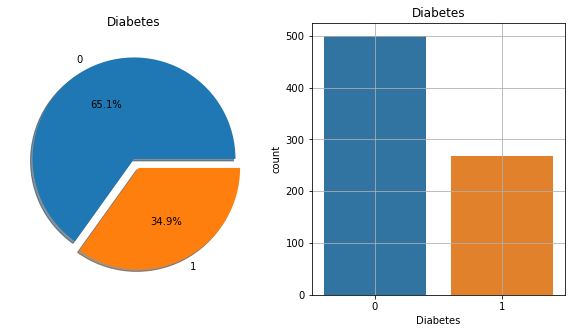

In [13]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Diabetes')
ax[0].set_ylabel('')
sns.countplot('Diabetes',data=df,ax=ax[1])
ax[1].set_title('Diabetes')
N,P = df['Diabetes'].value_counts()
print('Negative (0): ',N)
print('Positive (1): ',P)
plt.grid()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

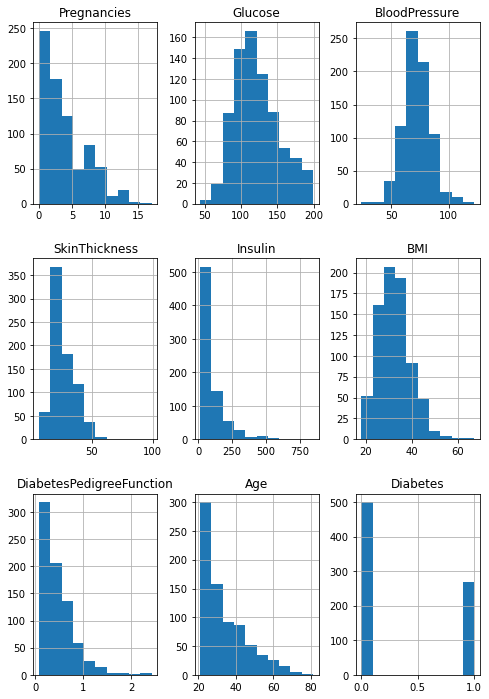

In [14]:
df.hist(bins=10,figsize=(8,12))
plt.show

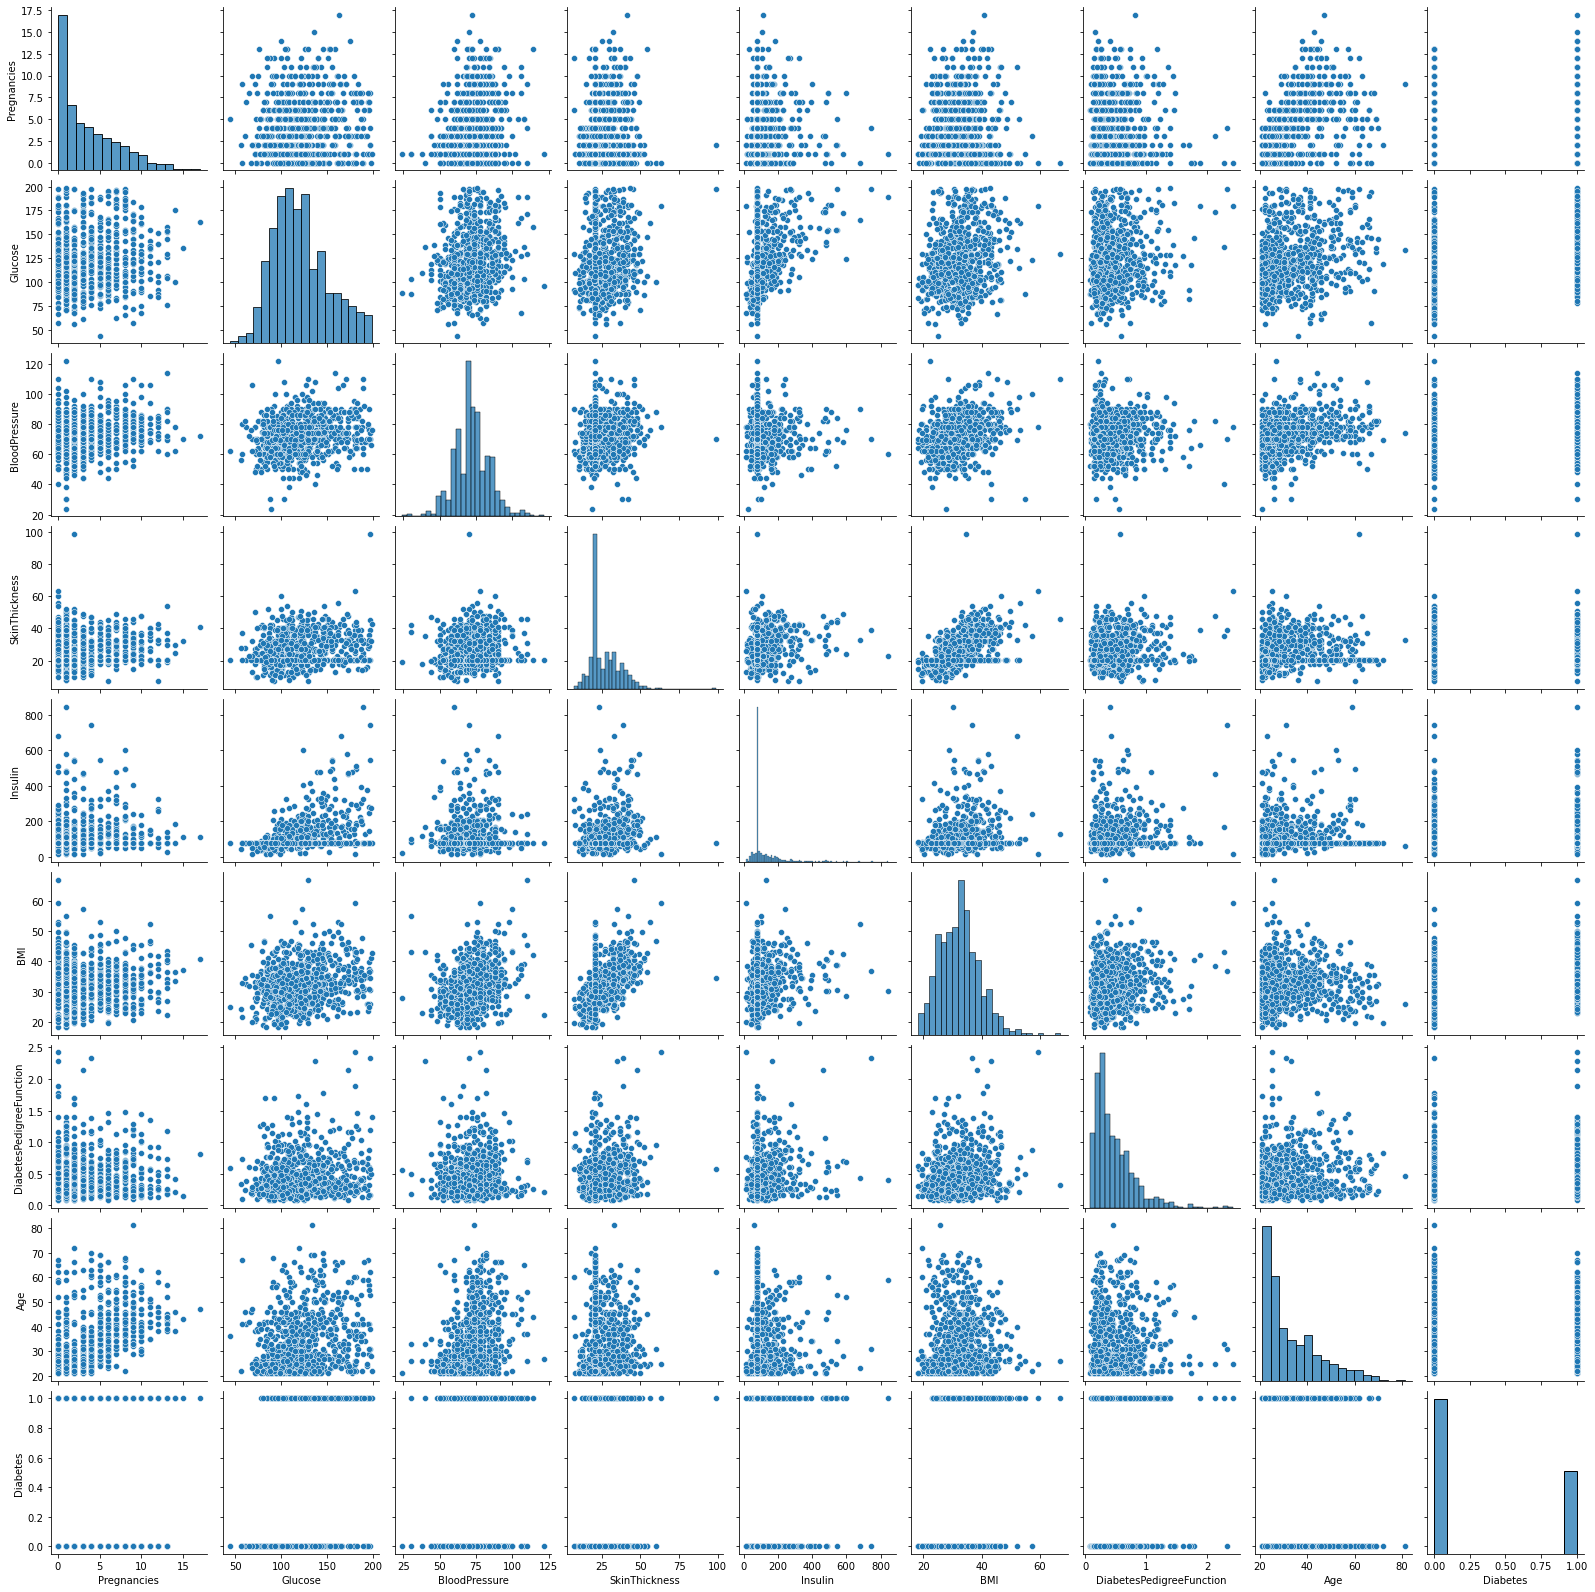

In [15]:
sns.pairplot(df)

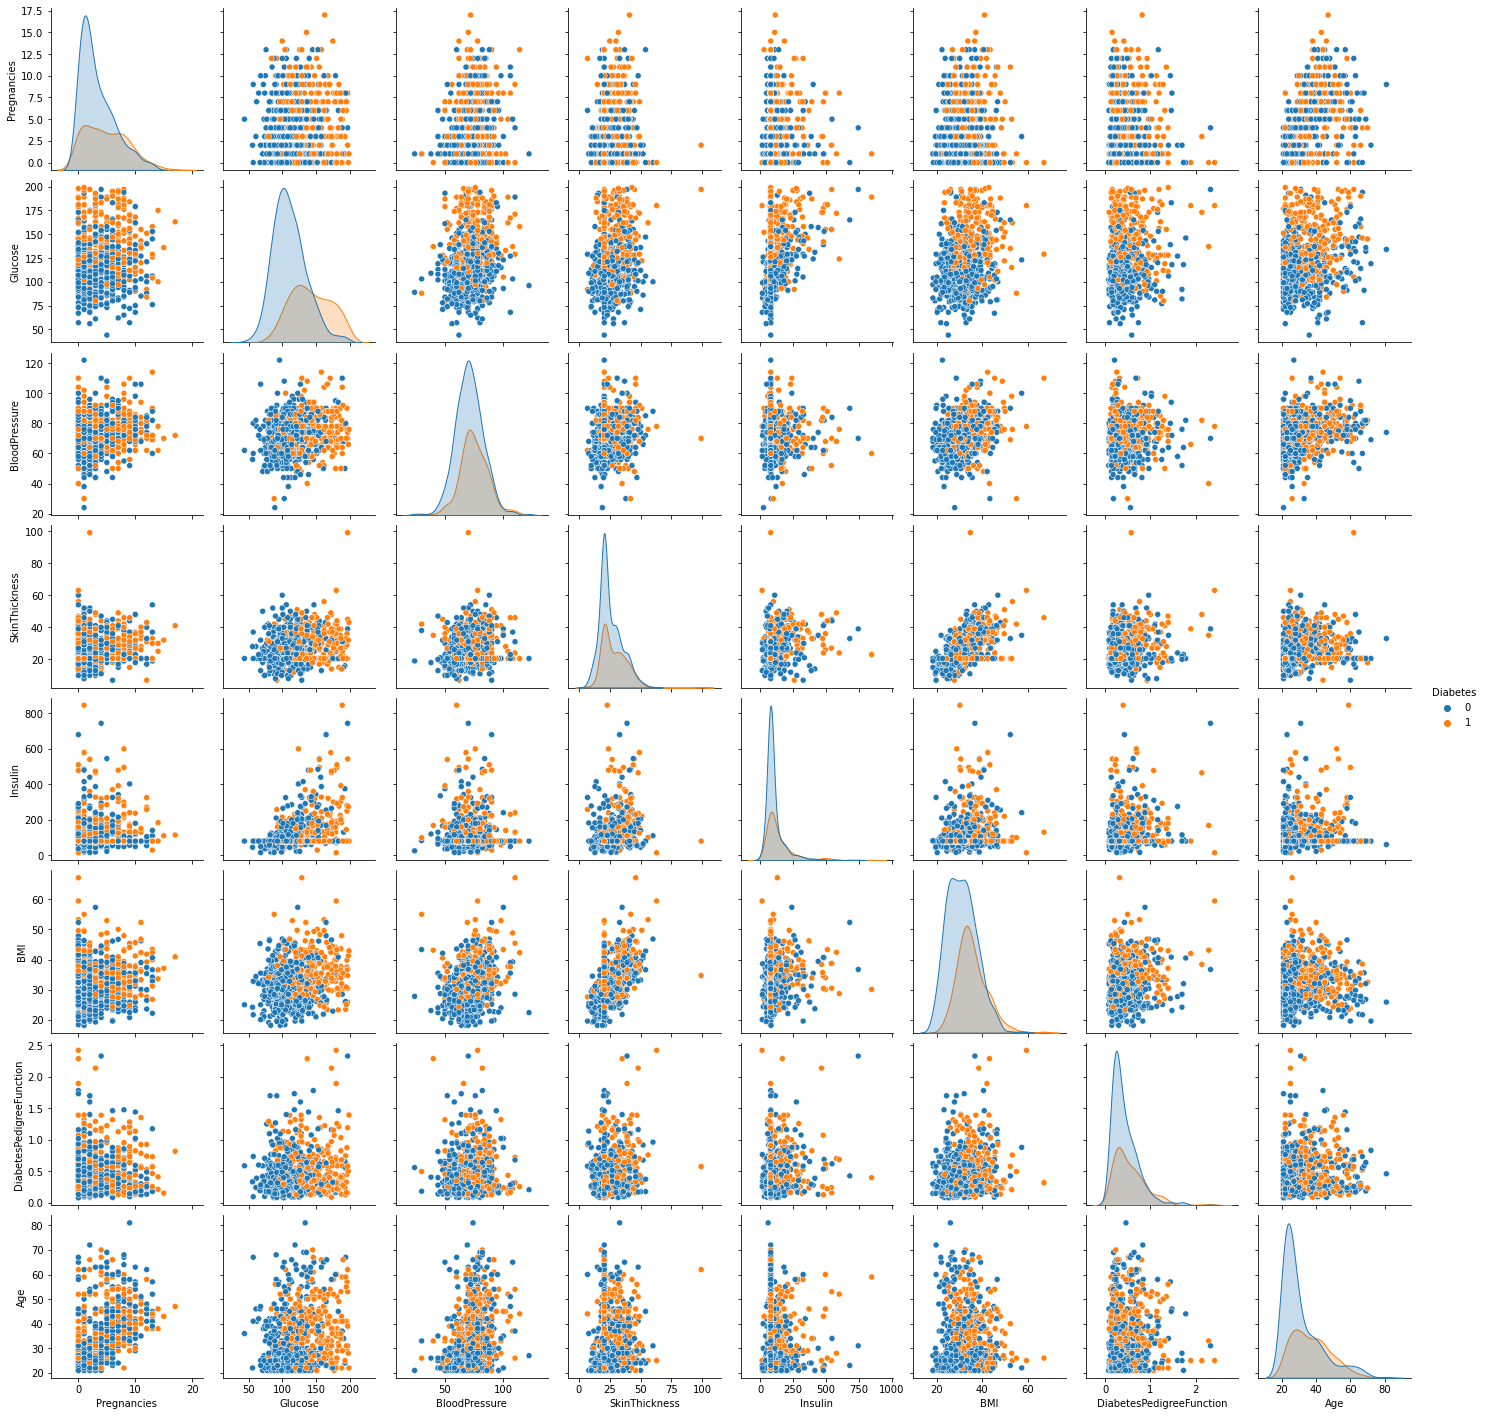

In [16]:
sns.pairplot(data = df, hue = 'Diabetes')
plt.show()    

<AxesSubplot:>

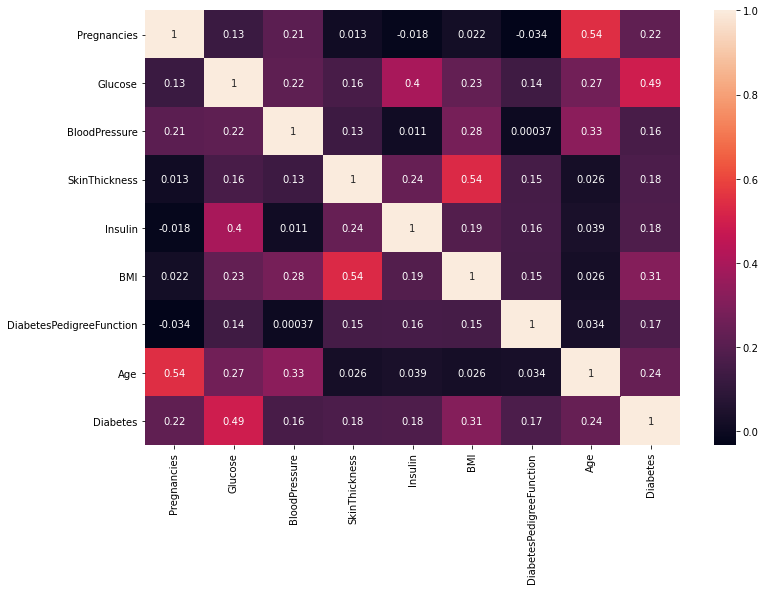

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [18]:
X=df.drop('Diabetes',axis=1).values
y=df['Diabetes'].values

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(SSX,y,test_size=0.2,random_state=100)

In [21]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [22]:
X_test.shape,y_test.shape

((154, 8), (154,))

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), max_iter=15000, random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=15000,
              random_state=1, solver='lbfgs')

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
knn_pred=knn.predict(X_test)
clf2_pred=clf2.predict(X_test)
dt_pred=dt.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("Train Accuracy of KNN",knn.score(X_train,y_train)*100)
print("Accuracy (Test) score of KNN",knn.score(X_test, y_test)*100)
print("Accuracy score of KNN", accuracy_score(y_test,knn_pred)*100)
print("Precision score of KNN", precision_score(y_test,knn_pred)*100)
print("Micro Average Precision Score", precision_score(y_test,knn_pred,average='micro')*100)
print("Macro Average Precision Score", precision_score(y_test,knn_pred,average='macro')*100)
print("Weighted Average Precision Score", precision_score(y_test,knn_pred,average='weighted')*100)
print("Precision score on Non weighted score", precision_score(y_test,knn_pred,average=None)*100)

Train Accuracy of KNN 84.36482084690554
Accuracy (Test) score of KNN 69.48051948051948
Accuracy score of KNN 69.48051948051948
Precision score of KNN 56.25
Micro Average Precision Score 69.48051948051948
Macro Average Precision Score 65.86084905660378
Weighted Average Precision Score 68.85643837294782
Precision score on Non weighted score [75.47169811 56.25      ]


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
print('Classification Report of KNN: \n',classification_report(y_test,knn_pred,digits=4))

Classification Report of KNN: 
               precision    recall  f1-score   support

           0     0.7547    0.7921    0.7729       101
           1     0.5625    0.5094    0.5347        53

    accuracy                         0.6948       154
   macro avg     0.6586    0.6508    0.6538       154
weighted avg     0.6886    0.6948    0.6909       154



In [29]:
auc = roc_auc_score(y_test, knn_pred)
print("ROC AUC SCORE of KNN is", auc)

ROC AUC SCORE of KNN is 0.6507565850924716


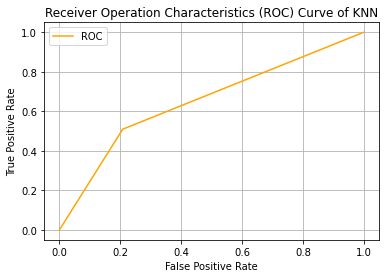

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operation Characteristics (ROC) Curve of KNN')
plt.legend()
plt.grid()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,knn_pred)
cm

array([[80, 21],
       [26, 27]], dtype=int64)

Text(51.0, 0.5, 'Predicted Values')

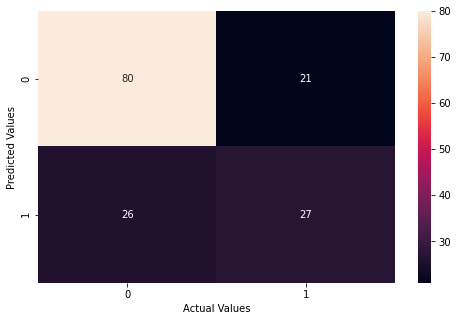

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("Train Accuracy of ANN",clf2.score(X_train,y_train)*100)
print("Accuracy (Test) score of ANN",clf2.score(X_test, y_test)*100)
print("Accuracy score of ANN", accuracy_score(y_test,clf2_pred)*100)
print("Precision score of ANN", precision_score(y_test,clf2_pred)*100)
print("Micro Average Precision Score", precision_score(y_test,clf2_pred,average='micro')*100)
print("Macro Average Precision Score", precision_score(y_test,clf2_pred,average='macro')*100)
print("Weighted Average Precision Score", precision_score(y_test,clf2_pred,average='weighted')*100)
print("Precision score on Non weighted score", precision_score(y_test,clf2_pred,average=None)*100)

Train Accuracy of ANN 83.22475570032573
Accuracy (Test) score of ANN 72.07792207792207
Accuracy score of ANN 72.07792207792207
Precision score of ANN 60.416666666666664
Micro Average Precision Score 72.07792207792207
Macro Average Precision Score 68.8875786163522
Weighted Average Precision Score 71.52786286041002
Precision score on Non weighted score [77.35849057 60.41666667]


In [34]:
print('Classification Report of ANN: \n',classification_report(y_test,clf2_pred,digits=4))

Classification Report of ANN: 
               precision    recall  f1-score   support

           0     0.7736    0.8119    0.7923       101
           1     0.6042    0.5472    0.5743        53

    accuracy                         0.7208       154
   macro avg     0.6889    0.6795    0.6833       154
weighted avg     0.7153    0.7208    0.7172       154



In [35]:
auc = roc_auc_score(y_test, clf2_pred)
print("ROC AUC SCORE of ANN is", auc)

ROC AUC SCORE of ANN is 0.6795254997197834


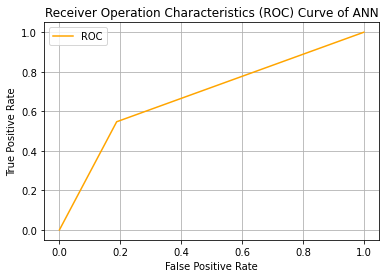

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, clf2_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operation Characteristics (ROC) Curve of ANN')
plt.legend()
plt.grid()
plt.show()

In [37]:
cm=confusion_matrix(y_test,clf2_pred)
cm

array([[82, 19],
       [24, 29]], dtype=int64)

Text(51.0, 0.5, 'Predicted Values')

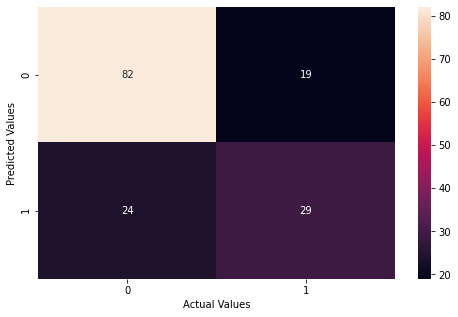

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("Train Accuracy of Decision Tree Classifier",dt.score(X_train,y_train)*100)
print("Accuracy (Test) score of Decision Tree Classifier",dt.score(X_test, y_test)*100)
print("Accuracy score of Decision Tree Classifier", accuracy_score(y_test,dt_pred)*100)
print("Precision score of Decision Tree Classifier", precision_score(y_test,dt_pred)*100)
print("Micro Average Precision Score", precision_score(y_test,dt_pred,average='micro')*100)
print("Macro Average Precision Score", precision_score(y_test,dt_pred,average='macro')*100)
print("Weighted Average Precision Score", precision_score(y_test,dt_pred,average='weighted')*100)
print("Precision score on Non weighted score", precision_score(y_test,dt_pred,average=None)*100)

Train Accuracy of Decision Tree Classifier 100.0
Accuracy (Test) score of Decision Tree Classifier 71.42857142857143
Accuracy score of Decision Tree Classifier 71.42857142857143
Precision score of Decision Tree Classifier 59.57446808510638
Micro Average Precision Score 71.42857142857143
Macro Average Precision Score 68.10499105189898
Weighted Average Precision Score 70.76385535323693
Precision score on Non weighted score [76.63551402 59.57446809]


In [40]:
print('Classification Report of Decision Tree Classifier: \n',classification_report(y_test,dt_pred,digits=4))

Classification Report of Decision Tree Classifier: 
               precision    recall  f1-score   support

           0     0.7664    0.8119    0.7885       101
           1     0.5957    0.5283    0.5600        53

    accuracy                         0.7143       154
   macro avg     0.6810    0.6701    0.6742       154
weighted avg     0.7076    0.7143    0.7098       154



In [41]:
auc = roc_auc_score(y_test, dt_pred)
print("ROC AUC SCORE of DT is", auc)

ROC AUC SCORE of DT is 0.6700915374556324


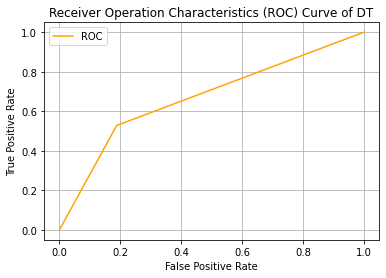

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operation Characteristics (ROC) Curve of DT')
plt.legend()
plt.grid()
plt.show()

In [43]:
cm=confusion_matrix(y_test,dt_pred)
cm

array([[82, 19],
       [25, 28]], dtype=int64)

Text(51.0, 0.5, 'Predicted Values')

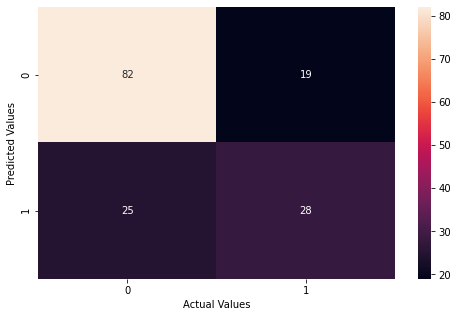

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [45]:
models_comparison = [['KNN',accuracy_score(y_test,knn_pred)*100],
                     ['ANN',accuracy_score(y_test,clf2_pred)*100], 
                     ['Decision Tree',accuracy_score(y_test,dt_pred)*100]
                    ]
models_compaison_df = pd.DataFrame(models_comparison,columns=['Model','% Accuracy'])
models_compaison_df.head()

,Model,% Accuracy
0,KNN,69.480519
1,ANN,72.077922
2,Decision Tree,71.428571


Text(0.5, 0, 'Model')

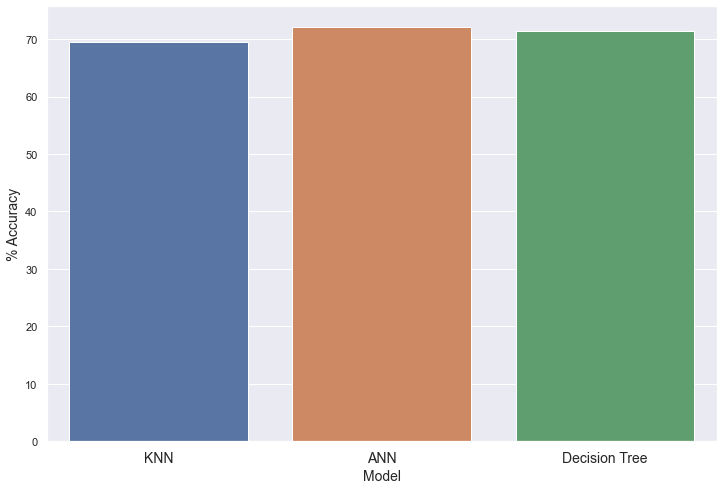

In [46]:
fig = plt.figure(figsize=(12,8))
sns.set()
sns.barplot(x='Model',y='% Accuracy',data=models_compaison_df)
plt.xticks(size=14)
plt.ylabel('% Accuracy',size=14)
plt.xlabel('Model',size=14)